In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("AirQualityUCI_complete_data.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [2]:
df = df.drop(["Date","Time"],axis=1)
df.head()

# Replace -200 (i.e. missing values) to mean value
df[:] = df[:].replace(-200,np.nan)
df.fillna(df.mean(), inplace=True)

In [3]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

df_normalize = normalize(df)
df_normalize.head(15)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511849,0.120981,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.333333,0.499057,0.280046
1,0.161017,0.463196,0.088832,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.326882,0.484287,0.264279
2,0.177966,0.542011,0.068528,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.296774,0.563168,0.276374
3,0.177966,0.522980,0.061760,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.277419,0.638906,0.294198
4,0.127119,0.448833,0.037225,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.280645,0.633564,0.295215
5,0.093220,0.394794,0.026227,0.072209,0.200464,0.058903,0.429736,0.278354,0.378597,0.316390,0.281183,0.628536,0.293249
6,0.093220,0.386176,0.020305,0.054650,0.167281,0.040623,0.482791,0.222091,0.351506,0.222222,0.284409,0.598366,0.281296
7,0.076271,0.351167,0.020305,0.049969,0.157722,0.040623,0.479191,0.219129,0.351506,0.220919,0.270430,0.638906,0.286147
8,0.067797,0.320826,0.014382,0.034444,0.123037,0.029113,0.532458,0.171750,0.325989,0.173129,0.269892,0.634821,0.283499
9,0.042373,0.260323,0.010152,0.024336,0.096955,0.165796,0.585831,0.328918,0.307442,0.121755,0.261290,0.641420,0.277067


In [4]:
# Check for null values

# print(df_normalize.isnull().sum())
# print(df_normalize[:].max())

In [5]:
# Split x_train and x_test
x_train = df_normalize

In [6]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
import keras
keras.backend.set_epsilon(0.001) # For mape error

input_size = 13
hidden_size_1 = 12
hidden_size_2 = 12
code_size = 12
activation = 'tanh'

input_layer = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation=activation)(input_layer)
hidden_12 = Dense(hidden_size_2, activation=activation)(hidden_1)
code = Dense(code_size)(hidden_12)
hidden_22 = Dense(hidden_size_2, activation=activation)(code)
hidden_2 = Dense(hidden_size_1, activation=activation)(hidden_22)
output_layer = Dense(input_size)(hidden_2)

# input_layer = Input(shape=(input_size,))
# hidden_1 = Dense(hidden_size_1, activation='tanh')(input_layer)
# code = Dense(code_size)(hidden_1)
# hidden_2 = Dense(hidden_size_1, activation='tanh')(code)
# output_layer = Dense(input_size)(hidden_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=Adam(lr=0.001, epsilon=1e-08), loss='mse', metrics=['mape'])
history = autoencoder.fit(x_train, x_train, epochs=1000, validation_split=0.2, batch_size=32)

Using TensorFlow backend.
W0302 08:58:05.162154  9776 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0302 08:58:05.190891  9776 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0302 08:58:05.202657  9776 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0302 08:58:05.312871  9776 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0302 08:58:05.461982  9776 deprecation_wrapper.py:119

Train on 7485 samples, validate on 1872 samples
Epoch 1/1000
7485/7485 [==============================] - 4s 515us/step - loss: 0.0235 - mean_absolute_percentage_error: 58.5575 - val_loss: 0.0090 - val_mean_absolute_percentage_error: 66.7254
Epoch 2/1000
7485/7485 [==============================] - 1s 94us/step - loss: 0.0051 - mean_absolute_percentage_error: 28.9453 - val_loss: 0.0043 - val_mean_absolute_percentage_error: 45.3315
Epoch 3/1000
7485/7485 [==============================] - 0s 57us/step - loss: 0.0027 - mean_absolute_percentage_error: 22.0735 - val_loss: 0.0033 - val_mean_absolute_percentage_error: 37.4601
Epoch 4/1000
7485/7485 [==============================] - 0s 55us/step - loss: 0.0020 - mean_absolute_percentage_error: 19.6486 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 35.8703
Epoch 5/1000
7485/7485 [==============================] - 0s 46us/step - loss: 0.0016 - mean_absolute_percentage_error: 18.3666 - val_loss: 0.0025 - val_mean_absolute_percentage_e

7485/7485 [==============================] - 1s 71us/step - loss: 2.3568e-04 - mean_absolute_percentage_error: 7.2170 - val_loss: 4.5093e-04 - val_mean_absolute_percentage_error: 20.8508
Epoch 43/1000
7485/7485 [==============================] - 0s 66us/step - loss: 2.2735e-04 - mean_absolute_percentage_error: 7.1045 - val_loss: 4.6595e-04 - val_mean_absolute_percentage_error: 21.3604
Epoch 44/1000
7485/7485 [==============================] - 0s 64us/step - loss: 2.2051e-04 - mean_absolute_percentage_error: 6.9822 - val_loss: 4.1845e-04 - val_mean_absolute_percentage_error: 21.0939
Epoch 45/1000
7485/7485 [==============================] - 0s 67us/step - loss: 2.1121e-04 - mean_absolute_percentage_error: 6.7976 - val_loss: 4.0035e-04 - val_mean_absolute_percentage_error: 20.5700
Epoch 46/1000
7485/7485 [==============================] - 0s 66us/step - loss: 1.9668e-04 - mean_absolute_percentage_error: 6.5774 - val_loss: 3.1564e-04 - val_mean_absolute_percentage_error: 17.9259
Epoch 47/

Epoch 83/1000
7485/7485 [==============================] - 1s 72us/step - loss: 9.6077e-05 - mean_absolute_percentage_error: 4.1885 - val_loss: 1.0194e-04 - val_mean_absolute_percentage_error: 7.8004
Epoch 84/1000
7485/7485 [==============================] - 0s 66us/step - loss: 9.4716e-05 - mean_absolute_percentage_error: 4.1278 - val_loss: 1.0117e-04 - val_mean_absolute_percentage_error: 7.6480
Epoch 85/1000
7485/7485 [==============================] - 0s 64us/step - loss: 9.4949e-05 - mean_absolute_percentage_error: 4.1470 - val_loss: 1.0308e-04 - val_mean_absolute_percentage_error: 7.5720
Epoch 86/1000
7485/7485 [==============================] - 1s 67us/step - loss: 9.4676e-05 - mean_absolute_percentage_error: 4.1497 - val_loss: 9.8426e-05 - val_mean_absolute_percentage_error: 8.1053
Epoch 87/1000
7485/7485 [==============================] - 1s 72us/step - loss: 9.4145e-05 - mean_absolute_percentage_error: 4.1510 - val_loss: 1.0291e-04 - val_mean_absolute_percentage_error: 8.4850


Epoch 124/1000
7485/7485 [==============================] - 1s 69us/step - loss: 1.9564e-05 - mean_absolute_percentage_error: 2.0956 - val_loss: 4.6847e-05 - val_mean_absolute_percentage_error: 6.1760
Epoch 125/1000
7485/7485 [==============================] - 1s 77us/step - loss: 2.0193e-05 - mean_absolute_percentage_error: 2.1462 - val_loss: 4.6018e-05 - val_mean_absolute_percentage_error: 6.1342
Epoch 126/1000
7485/7485 [==============================] - 1s 76us/step - loss: 2.1200e-05 - mean_absolute_percentage_error: 2.1779 - val_loss: 5.7123e-05 - val_mean_absolute_percentage_error: 7.2661
Epoch 127/1000
7485/7485 [==============================] - 1s 80us/step - loss: 2.0545e-05 - mean_absolute_percentage_error: 2.1255 - val_loss: 4.3047e-05 - val_mean_absolute_percentage_error: 5.6534
Epoch 128/1000
7485/7485 [==============================] - 1s 93us/step - loss: 1.9958e-05 - mean_absolute_percentage_error: 2.1015 - val_loss: 5.0236e-05 - val_mean_absolute_percentage_error: 5.

Epoch 165/1000
7485/7485 [==============================] - 1s 73us/step - loss: 1.8231e-05 - mean_absolute_percentage_error: 1.9913 - val_loss: 5.0150e-05 - val_mean_absolute_percentage_error: 5.8327
Epoch 166/1000
7485/7485 [==============================] - 1s 79us/step - loss: 1.8688e-05 - mean_absolute_percentage_error: 2.0397 - val_loss: 3.8205e-05 - val_mean_absolute_percentage_error: 5.4317
Epoch 167/1000
7485/7485 [==============================] - 1s 76us/step - loss: 1.7980e-05 - mean_absolute_percentage_error: 1.9615 - val_loss: 3.8148e-05 - val_mean_absolute_percentage_error: 5.6708
Epoch 168/1000
7485/7485 [==============================] - 1s 71us/step - loss: 1.7826e-05 - mean_absolute_percentage_error: 1.9746 - val_loss: 4.5546e-05 - val_mean_absolute_percentage_error: 6.1728
Epoch 169/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.7972e-05 - mean_absolute_percentage_error: 1.9412 - val_loss: 3.8175e-05 - val_mean_absolute_percentage_error: 5.

Epoch 206/1000
7485/7485 [==============================] - 1s 72us/step - loss: 1.6854e-05 - mean_absolute_percentage_error: 1.8722 - val_loss: 4.1206e-05 - val_mean_absolute_percentage_error: 5.7274
Epoch 207/1000
7485/7485 [==============================] - 1s 69us/step - loss: 1.7270e-05 - mean_absolute_percentage_error: 1.9071 - val_loss: 4.4883e-05 - val_mean_absolute_percentage_error: 5.6998
Epoch 208/1000
7485/7485 [==============================] - 1s 88us/step - loss: 1.6564e-05 - mean_absolute_percentage_error: 1.8511 - val_loss: 3.9027e-05 - val_mean_absolute_percentage_error: 5.6309
Epoch 209/1000
7485/7485 [==============================] - 0s 34us/step - loss: 1.6455e-05 - mean_absolute_percentage_error: 1.8053 - val_loss: 3.9683e-05 - val_mean_absolute_percentage_error: 5.7681
Epoch 210/1000
7485/7485 [==============================] - 0s 64us/step - loss: 1.7947e-05 - mean_absolute_percentage_error: 1.9612 - val_loss: 3.7300e-05 - val_mean_absolute_percentage_error: 5.

Epoch 247/1000
7485/7485 [==============================] - 1s 75us/step - loss: 1.6880e-05 - mean_absolute_percentage_error: 1.8634 - val_loss: 4.4965e-05 - val_mean_absolute_percentage_error: 6.1828
Epoch 248/1000
7485/7485 [==============================] - 1s 76us/step - loss: 1.5949e-05 - mean_absolute_percentage_error: 1.8387 - val_loss: 3.3270e-05 - val_mean_absolute_percentage_error: 5.1202
Epoch 249/1000
7485/7485 [==============================] - 1s 76us/step - loss: 1.6677e-05 - mean_absolute_percentage_error: 1.8707 - val_loss: 3.9187e-05 - val_mean_absolute_percentage_error: 5.3584
Epoch 250/1000
7485/7485 [==============================] - 1s 74us/step - loss: 1.6169e-05 - mean_absolute_percentage_error: 1.7935 - val_loss: 3.4851e-05 - val_mean_absolute_percentage_error: 5.2588
Epoch 251/1000
7485/7485 [==============================] - 1s 76us/step - loss: 1.6513e-05 - mean_absolute_percentage_error: 1.8721 - val_loss: 3.4623e-05 - val_mean_absolute_percentage_error: 5.

7485/7485 [==============================] - 1s 69us/step - loss: 1.6592e-05 - mean_absolute_percentage_error: 1.8373 - val_loss: 5.4896e-05 - val_mean_absolute_percentage_error: 7.0005
Epoch 288/1000
7485/7485 [==============================] - 0s 54us/step - loss: 1.6227e-05 - mean_absolute_percentage_error: 1.8293 - val_loss: 4.0756e-05 - val_mean_absolute_percentage_error: 5.7095
Epoch 289/1000
7485/7485 [==============================] - 0s 55us/step - loss: 1.6239e-05 - mean_absolute_percentage_error: 1.8503 - val_loss: 4.3540e-05 - val_mean_absolute_percentage_error: 5.8331
Epoch 290/1000
7485/7485 [==============================] - 0s 59us/step - loss: 1.5920e-05 - mean_absolute_percentage_error: 1.7892 - val_loss: 4.0367e-05 - val_mean_absolute_percentage_error: 5.4163
Epoch 291/1000
7485/7485 [==============================] - 0s 54us/step - loss: 1.6180e-05 - mean_absolute_percentage_error: 1.8219 - val_loss: 4.2932e-05 - val_mean_absolute_percentage_error: 5.6775
Epoch 292/

Epoch 328/1000
7485/7485 [==============================] - 1s 93us/step - loss: 1.5372e-05 - mean_absolute_percentage_error: 1.7544 - val_loss: 3.6589e-05 - val_mean_absolute_percentage_error: 5.5365
Epoch 329/1000
7485/7485 [==============================] - 1s 84us/step - loss: 1.5901e-05 - mean_absolute_percentage_error: 1.8048 - val_loss: 3.9047e-05 - val_mean_absolute_percentage_error: 5.5831
Epoch 330/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.6678e-05 - mean_absolute_percentage_error: 1.8836 - val_loss: 5.8619e-05 - val_mean_absolute_percentage_error: 6.3437
Epoch 331/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.5796e-05 - mean_absolute_percentage_error: 1.7657 - val_loss: 3.9044e-05 - val_mean_absolute_percentage_error: 5.1547
Epoch 332/1000
7485/7485 [==============================] - 1s 91us/step - loss: 1.5529e-05 - mean_absolute_percentage_error: 1.7457 - val_loss: 4.7428e-05 - val_mean_absolute_percentage_error: 6.

Epoch 369/1000
7485/7485 [==============================] - 1s 178us/step - loss: 1.5175e-05 - mean_absolute_percentage_error: 1.7265 - val_loss: 4.5998e-05 - val_mean_absolute_percentage_error: 6.1507
Epoch 370/1000
7485/7485 [==============================] - 2s 208us/step - loss: 1.6713e-05 - mean_absolute_percentage_error: 1.8380 - val_loss: 4.1572e-05 - val_mean_absolute_percentage_error: 5.7471
Epoch 371/1000
7485/7485 [==============================] - 1s 136us/step - loss: 1.4885e-05 - mean_absolute_percentage_error: 1.7003 - val_loss: 4.3944e-05 - val_mean_absolute_percentage_error: 6.1656
Epoch 372/1000
7485/7485 [==============================] - 1s 101us/step - loss: 1.5594e-05 - mean_absolute_percentage_error: 1.7532 - val_loss: 4.5413e-05 - val_mean_absolute_percentage_error: 5.9408
Epoch 373/1000
7485/7485 [==============================] - 1s 100us/step - loss: 1.5096e-05 - mean_absolute_percentage_error: 1.7323 - val_loss: 4.3491e-05 - val_mean_absolute_percentage_erro

Epoch 410/1000
7485/7485 [==============================] - 1s 92us/step - loss: 1.5218e-05 - mean_absolute_percentage_error: 1.7283 - val_loss: 4.1205e-05 - val_mean_absolute_percentage_error: 5.8770
Epoch 411/1000
7485/7485 [==============================] - 1s 81us/step - loss: 1.5199e-05 - mean_absolute_percentage_error: 1.7316 - val_loss: 3.3446e-05 - val_mean_absolute_percentage_error: 5.1519
Epoch 412/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.5019e-05 - mean_absolute_percentage_error: 1.6956 - val_loss: 4.4029e-05 - val_mean_absolute_percentage_error: 6.0366
Epoch 413/1000
7485/7485 [==============================] - 1s 87us/step - loss: 1.5913e-05 - mean_absolute_percentage_error: 1.8077 - val_loss: 3.2446e-05 - val_mean_absolute_percentage_error: 5.0181
Epoch 414/1000
7485/7485 [==============================] - 1s 90us/step - loss: 1.4967e-05 - mean_absolute_percentage_error: 1.7127 - val_loss: 3.5244e-05 - val_mean_absolute_percentage_error: 5.

Epoch 451/1000
7485/7485 [==============================] - 1s 86us/step - loss: 1.4728e-05 - mean_absolute_percentage_error: 1.6806 - val_loss: 3.8876e-05 - val_mean_absolute_percentage_error: 5.6528
Epoch 452/1000
7485/7485 [==============================] - 1s 88us/step - loss: 1.4980e-05 - mean_absolute_percentage_error: 1.7184 - val_loss: 4.2708e-05 - val_mean_absolute_percentage_error: 5.6995
Epoch 453/1000
7485/7485 [==============================] - 1s 79us/step - loss: 1.5693e-05 - mean_absolute_percentage_error: 1.7785 - val_loss: 3.8772e-05 - val_mean_absolute_percentage_error: 5.5234
Epoch 454/1000
7485/7485 [==============================] - 1s 82us/step - loss: 1.5250e-05 - mean_absolute_percentage_error: 1.7666 - val_loss: 3.9021e-05 - val_mean_absolute_percentage_error: 5.2884
Epoch 455/1000
7485/7485 [==============================] - 1s 97us/step - loss: 1.5320e-05 - mean_absolute_percentage_error: 1.7483 - val_loss: 4.1131e-05 - val_mean_absolute_percentage_error: 5.

Epoch 492/1000
7485/7485 [==============================] - 1s 84us/step - loss: 1.5010e-05 - mean_absolute_percentage_error: 1.7029 - val_loss: 3.7015e-05 - val_mean_absolute_percentage_error: 5.3968
Epoch 493/1000
7485/7485 [==============================] - 1s 86us/step - loss: 1.5188e-05 - mean_absolute_percentage_error: 1.6995 - val_loss: 4.5452e-05 - val_mean_absolute_percentage_error: 5.8509
Epoch 494/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.5298e-05 - mean_absolute_percentage_error: 1.7361 - val_loss: 3.3748e-05 - val_mean_absolute_percentage_error: 5.0800
Epoch 495/1000
7485/7485 [==============================] - 1s 87us/step - loss: 1.5252e-05 - mean_absolute_percentage_error: 1.7439 - val_loss: 4.2336e-05 - val_mean_absolute_percentage_error: 5.6247
Epoch 496/1000
7485/7485 [==============================] - 1s 87us/step - loss: 1.5254e-05 - mean_absolute_percentage_error: 1.7252 - val_loss: 3.3378e-05 - val_mean_absolute_percentage_error: 5.

Epoch 533/1000
7485/7485 [==============================] - 1s 93us/step - loss: 1.5309e-05 - mean_absolute_percentage_error: 1.7451 - val_loss: 3.4662e-05 - val_mean_absolute_percentage_error: 5.2630
Epoch 534/1000
7485/7485 [==============================] - 1s 80us/step - loss: 1.4869e-05 - mean_absolute_percentage_error: 1.6679 - val_loss: 3.5852e-05 - val_mean_absolute_percentage_error: 5.4790
Epoch 535/1000
7485/7485 [==============================] - 1s 88us/step - loss: 1.6567e-05 - mean_absolute_percentage_error: 1.8220 - val_loss: 3.5252e-05 - val_mean_absolute_percentage_error: 5.3407
Epoch 536/1000
7485/7485 [==============================] - 1s 87us/step - loss: 1.5901e-05 - mean_absolute_percentage_error: 1.7993 - val_loss: 4.3283e-05 - val_mean_absolute_percentage_error: 5.5044
Epoch 537/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.4852e-05 - mean_absolute_percentage_error: 1.7150 - val_loss: 4.6559e-05 - val_mean_absolute_percentage_error: 6.

Epoch 574/1000
7485/7485 [==============================] - 1s 81us/step - loss: 1.4674e-05 - mean_absolute_percentage_error: 1.6655 - val_loss: 3.9508e-05 - val_mean_absolute_percentage_error: 5.3175
Epoch 575/1000
7485/7485 [==============================] - 1s 80us/step - loss: 1.5335e-05 - mean_absolute_percentage_error: 1.7445 - val_loss: 3.2569e-05 - val_mean_absolute_percentage_error: 4.9009
Epoch 576/1000
7485/7485 [==============================] - 1s 75us/step - loss: 1.4581e-05 - mean_absolute_percentage_error: 1.6760 - val_loss: 3.5555e-05 - val_mean_absolute_percentage_error: 5.3727
Epoch 577/1000
7485/7485 [==============================] - 1s 83us/step - loss: 1.5102e-05 - mean_absolute_percentage_error: 1.7196 - val_loss: 3.4487e-05 - val_mean_absolute_percentage_error: 5.6685
Epoch 578/1000
7485/7485 [==============================] - 1s 80us/step - loss: 1.5463e-05 - mean_absolute_percentage_error: 1.7395 - val_loss: 3.2689e-05 - val_mean_absolute_percentage_error: 5.

Epoch 615/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.4687e-05 - mean_absolute_percentage_error: 1.6843 - val_loss: 3.8957e-05 - val_mean_absolute_percentage_error: 5.6511
Epoch 616/1000
7485/7485 [==============================] - 1s 90us/step - loss: 1.5150e-05 - mean_absolute_percentage_error: 1.7370 - val_loss: 4.0512e-05 - val_mean_absolute_percentage_error: 5.5846
Epoch 617/1000
7485/7485 [==============================] - 1s 98us/step - loss: 1.4687e-05 - mean_absolute_percentage_error: 1.6949 - val_loss: 3.8017e-05 - val_mean_absolute_percentage_error: 5.3758
Epoch 618/1000
7485/7485 [==============================] - 1s 108us/step - loss: 1.4479e-05 - mean_absolute_percentage_error: 1.6651 - val_loss: 3.0680e-05 - val_mean_absolute_percentage_error: 4.9508
Epoch 619/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.5974e-05 - mean_absolute_percentage_error: 1.7933 - val_loss: 3.9192e-05 - val_mean_absolute_percentage_error: 5

Epoch 656/1000
7485/7485 [==============================] - 1s 84us/step - loss: 1.5209e-05 - mean_absolute_percentage_error: 1.7474 - val_loss: 3.6382e-05 - val_mean_absolute_percentage_error: 5.8843
Epoch 657/1000
7485/7485 [==============================] - 1s 94us/step - loss: 1.4546e-05 - mean_absolute_percentage_error: 1.6857 - val_loss: 3.3555e-05 - val_mean_absolute_percentage_error: 5.1218
Epoch 658/1000
7485/7485 [==============================] - 1s 94us/step - loss: 1.4356e-05 - mean_absolute_percentage_error: 1.6298 - val_loss: 3.8201e-05 - val_mean_absolute_percentage_error: 5.6595
Epoch 659/1000
7485/7485 [==============================] - 1s 85us/step - loss: 1.5346e-05 - mean_absolute_percentage_error: 1.7421 - val_loss: 3.6066e-05 - val_mean_absolute_percentage_error: 5.3932
Epoch 660/1000
7485/7485 [==============================] - 1s 99us/step - loss: 1.4616e-05 - mean_absolute_percentage_error: 1.6750 - val_loss: 4.1325e-05 - val_mean_absolute_percentage_error: 5.

7485/7485 [==============================] - 1s 74us/step - loss: 1.4629e-05 - mean_absolute_percentage_error: 1.6877 - val_loss: 3.5839e-05 - val_mean_absolute_percentage_error: 5.3296
Epoch 697/1000
7485/7485 [==============================] - 0s 47us/step - loss: 1.6383e-05 - mean_absolute_percentage_error: 1.8221 - val_loss: 3.1615e-05 - val_mean_absolute_percentage_error: 5.0159
Epoch 698/1000
7485/7485 [==============================] - 0s 53us/step - loss: 1.5063e-05 - mean_absolute_percentage_error: 1.7028 - val_loss: 4.4461e-05 - val_mean_absolute_percentage_error: 5.7796
Epoch 699/1000
7485/7485 [==============================] - ETA: 0s - loss: 1.5301e-05 - mean_absolute_percentage_error: 1.76 - 1s 88us/step - loss: 1.5251e-05 - mean_absolute_percentage_error: 1.7485 - val_loss: 3.0758e-05 - val_mean_absolute_percentage_error: 4.8250
Epoch 700/1000
7485/7485 [==============================] - 1s 92us/step - loss: 1.4370e-05 - mean_absolute_percentage_error: 1.6646 - val_loss

7485/7485 [==============================] - 1s 168us/step - loss: 1.4290e-05 - mean_absolute_percentage_error: 1.6418 - val_loss: 3.7532e-05 - val_mean_absolute_percentage_error: 5.4555
Epoch 737/1000
7485/7485 [==============================] - 1s 145us/step - loss: 1.5008e-05 - mean_absolute_percentage_error: 1.7345 - val_loss: 3.8178e-05 - val_mean_absolute_percentage_error: 5.5704
Epoch 738/1000
7485/7485 [==============================] - 1s 131us/step - loss: 1.5212e-05 - mean_absolute_percentage_error: 1.7205 - val_loss: 3.6779e-05 - val_mean_absolute_percentage_error: 5.4141
Epoch 739/1000
7485/7485 [==============================] - 1s 157us/step - loss: 1.5225e-05 - mean_absolute_percentage_error: 1.7408 - val_loss: 4.3290e-05 - val_mean_absolute_percentage_error: 5.5830
Epoch 740/1000
7485/7485 [==============================] - 1s 137us/step - loss: 1.4603e-05 - mean_absolute_percentage_error: 1.6653 - val_loss: 3.4580e-05 - val_mean_absolute_percentage_error: 5.0519
Epoch

Epoch 776/1000
7485/7485 [==============================] - 1s 87us/step - loss: 1.5589e-05 - mean_absolute_percentage_error: 1.7577 - val_loss: 3.6371e-05 - val_mean_absolute_percentage_error: 5.2141
Epoch 777/1000
7485/7485 [==============================] - 1s 89us/step - loss: 1.4310e-05 - mean_absolute_percentage_error: 1.6392 - val_loss: 4.1616e-05 - val_mean_absolute_percentage_error: 5.7802
Epoch 778/1000
7485/7485 [==============================] - 1s 83us/step - loss: 1.4957e-05 - mean_absolute_percentage_error: 1.6983 - val_loss: 4.0705e-05 - val_mean_absolute_percentage_error: 5.9984
Epoch 779/1000
7485/7485 [==============================] - 1s 86us/step - loss: 1.4471e-05 - mean_absolute_percentage_error: 1.6667 - val_loss: 3.3939e-05 - val_mean_absolute_percentage_error: 5.1381
Epoch 780/1000
7485/7485 [==============================] - 1s 83us/step - loss: 1.4962e-05 - mean_absolute_percentage_error: 1.7139 - val_loss: 4.0717e-05 - val_mean_absolute_percentage_error: 5.

Epoch 817/1000
7485/7485 [==============================] - 1s 129us/step - loss: 1.4553e-05 - mean_absolute_percentage_error: 1.6693 - val_loss: 4.5770e-05 - val_mean_absolute_percentage_error: 6.1969
Epoch 818/1000
7485/7485 [==============================] - 1s 122us/step - loss: 1.4853e-05 - mean_absolute_percentage_error: 1.6960 - val_loss: 3.8135e-05 - val_mean_absolute_percentage_error: 5.5147
Epoch 819/1000
7485/7485 [==============================] - 1s 130us/step - loss: 1.4463e-05 - mean_absolute_percentage_error: 1.6482 - val_loss: 2.9756e-05 - val_mean_absolute_percentage_error: 4.9985
Epoch 820/1000
7485/7485 [==============================] - 1s 123us/step - loss: 1.4383e-05 - mean_absolute_percentage_error: 1.6440 - val_loss: 3.6367e-05 - val_mean_absolute_percentage_error: 5.2145
Epoch 821/1000
7485/7485 [==============================] - 1s 79us/step - loss: 1.4934e-05 - mean_absolute_percentage_error: 1.7274 - val_loss: 4.3952e-05 - val_mean_absolute_percentage_error

Epoch 858/1000
7485/7485 [==============================] - 1s 81us/step - loss: 1.4631e-05 - mean_absolute_percentage_error: 1.6656 - val_loss: 3.7988e-05 - val_mean_absolute_percentage_error: 5.9672
Epoch 859/1000
7485/7485 [==============================] - 1s 81us/step - loss: 1.6065e-05 - mean_absolute_percentage_error: 1.8029 - val_loss: 3.9174e-05 - val_mean_absolute_percentage_error: 5.3864
Epoch 860/1000
7485/7485 [==============================] - 1s 80us/step - loss: 1.4515e-05 - mean_absolute_percentage_error: 1.6477 - val_loss: 4.6201e-05 - val_mean_absolute_percentage_error: 6.0134
Epoch 861/1000
7485/7485 [==============================] - 1s 82us/step - loss: 1.4307e-05 - mean_absolute_percentage_error: 1.6419 - val_loss: 4.2164e-05 - val_mean_absolute_percentage_error: 5.5579
Epoch 862/1000
7485/7485 [==============================] - 1s 80us/step - loss: 1.4870e-05 - mean_absolute_percentage_error: 1.6641 - val_loss: 3.7495e-05 - val_mean_absolute_percentage_error: 5.

Epoch 899/1000
7485/7485 [==============================] - 1s 84us/step - loss: 1.4748e-05 - mean_absolute_percentage_error: 1.7028 - val_loss: 4.1505e-05 - val_mean_absolute_percentage_error: 5.5969
Epoch 900/1000
7485/7485 [==============================] - 1s 78us/step - loss: 1.5087e-05 - mean_absolute_percentage_error: 1.7095 - val_loss: 3.2178e-05 - val_mean_absolute_percentage_error: 5.0742
Epoch 901/1000
7485/7485 [==============================] - 1s 85us/step - loss: 1.4856e-05 - mean_absolute_percentage_error: 1.6831 - val_loss: 3.0175e-05 - val_mean_absolute_percentage_error: 4.8360
Epoch 902/1000
7485/7485 [==============================] - 1s 82us/step - loss: 1.4310e-05 - mean_absolute_percentage_error: 1.6432 - val_loss: 3.7474e-05 - val_mean_absolute_percentage_error: 5.3921
Epoch 903/1000
7485/7485 [==============================] - 1s 80us/step - loss: 1.5865e-05 - mean_absolute_percentage_error: 1.7868 - val_loss: 3.4657e-05 - val_mean_absolute_percentage_error: 5.

Epoch 940/1000
7485/7485 [==============================] - 1s 90us/step - loss: 1.4746e-05 - mean_absolute_percentage_error: 1.6798 - val_loss: 4.0272e-05 - val_mean_absolute_percentage_error: 5.5540
Epoch 941/1000
7485/7485 [==============================] - 1s 97us/step - loss: 1.4740e-05 - mean_absolute_percentage_error: 1.6856 - val_loss: 4.0742e-05 - val_mean_absolute_percentage_error: 5.5750
Epoch 942/1000
7485/7485 [==============================] - 1s 105us/step - loss: 1.4827e-05 - mean_absolute_percentage_error: 1.7221 - val_loss: 3.2103e-05 - val_mean_absolute_percentage_error: 5.1961
Epoch 943/1000
7485/7485 [==============================] - 1s 95us/step - loss: 1.4489e-05 - mean_absolute_percentage_error: 1.6509 - val_loss: 4.5557e-05 - val_mean_absolute_percentage_error: 6.0496
Epoch 944/1000
7485/7485 [==============================] - 1s 95us/step - loss: 1.4812e-05 - mean_absolute_percentage_error: 1.7164 - val_loss: 3.5260e-05 - val_mean_absolute_percentage_error: 5

Epoch 981/1000
7485/7485 [==============================] - 1s 92us/step - loss: 1.4576e-05 - mean_absolute_percentage_error: 1.6914 - val_loss: 3.5864e-05 - val_mean_absolute_percentage_error: 5.1978
Epoch 982/1000
7485/7485 [==============================] - 1s 138us/step - loss: 1.4228e-05 - mean_absolute_percentage_error: 1.6318 - val_loss: 3.7303e-05 - val_mean_absolute_percentage_error: 5.3716oss: 1.3994e-05 - mean_absolute_
Epoch 983/1000
7485/7485 [==============================] - 1s 109us/step - loss: 1.5882e-05 - mean_absolute_percentage_error: 1.7821 - val_loss: 3.8751e-05 - val_mean_absolute_percentage_error: 5.3884
Epoch 984/1000
7485/7485 [==============================] - 1s 81us/step - loss: 1.4588e-05 - mean_absolute_percentage_error: 1.6841 - val_loss: 4.4410e-05 - val_mean_absolute_percentage_error: 5.6524
Epoch 985/1000
7485/7485 [==============================] - 1s 104us/step - loss: 1.4794e-05 - mean_absolute_percentage_error: 1.6878 - val_loss: 4.2163e-05 - val

In [7]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                169       
Total para

In [8]:
# autoencoder.save("autoencoder_model_3000_tanh_mse_13_12_12_12_epsi_0.01.h5")

<Figure size 576x432 with 0 Axes>

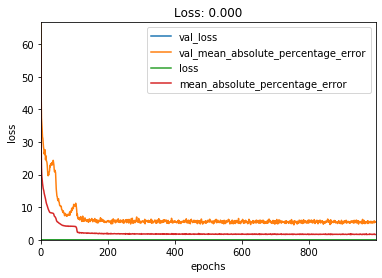

In [16]:
import matplotlib.pyplot as plt

historydf = pd.DataFrame(history.history, index=history.epoch)
plt.figure(figsize=(8, 6))
historydf.plot(ylim=(0, historydf.values.max()))
plt.title('Loss: %.3f' % history.history['loss'][-1])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [10]:
k = df_normalize.iloc[[10]]

k = np.array(k)
l = autoencoder.predict(k)

print(k)
print(l)

[[0.17396183 0.26122083 0.00592217 0.01799856 0.07838318 0.01286391
  0.63348512 0.09475866 0.29035522 0.09742587 0.25752688 0.64487742
  0.27454427]]
[[0.1727332  0.26009306 0.00543308 0.02349511 0.06992128 0.01275839
  0.633061   0.09693286 0.28880385 0.09652531 0.25786364 0.6429022
  0.27231595]]


In [17]:
# Input values for koopman approximator

# x_train_forward_time
forward_time_steps = 1
x_train_ft = x_train.shift(-forward_time_steps, axis=0)
print(x_train_ft.shape)

# Prune last forward_time_steps rows
x_train_koopman = x_train.drop(x_train.tail(forward_time_steps).index)
x_train_ft_koopman = x_train_ft.drop(x_train_ft.tail(forward_time_steps).index)

# print(x_train_koopman.tail(10))
# print(x_train_ft_koopman.tail(10))





(9357, 13)


In [18]:
# weight1=autoencoder.layers[0].get_weights()
# print(weight1)


In [19]:


input_layer_k = Input(shape=(input_size,))
hidden_1_k = Dense(hidden_size_1, activation=activation, trainable=False)(input_layer_k)
hidden_12_k = Dense(hidden_size_2, activation=activation, trainable=False)(hidden_1_k)
code_k = Dense(code_size, trainable=False)(hidden_12_k)
code_2_k = Dense(code_size)(code_k)
hidden_22_k = Dense(hidden_size_2, activation=activation, trainable=False)(code_2_k)
hidden_2_k = Dense(hidden_size_1, activation=activation, trainable=False)(hidden_22_k)
output_layer_k = Dense(input_size, trainable=False)(hidden_2_k)

koopman = Model(input_layer_k, output_layer_k)

wt = autoencoder.layers[1].get_weights()
koopman.layers[1].set_weights(wt)
wt = autoencoder.layers[2].get_weights()
koopman.layers[2].set_weights(wt)
wt = autoencoder.layers[3].get_weights()
koopman.layers[3].set_weights(wt)
wt = autoencoder.layers[4].get_weights()
koopman.layers[5].set_weights(wt)
wt = autoencoder.layers[5].get_weights()
koopman.layers[6].set_weights(wt)
wt = autoencoder.layers[6].get_weights()
koopman.layers[7].set_weights(wt)

print(koopman.summary())

koopman.compile(optimizer=Adam(epsilon=1e-08), loss='mse')
history_k = koopman.fit(x_train_koopman, x_train_ft_koopman, epochs=100, validation_split=0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_15 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_16 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_17 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_18 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_19 (Dense)             (None, 12)                156       
__________

7484/7484 [==============================] - 1s 69us/step - loss: 0.0033 - val_loss: 0.0035
Epoch 66/100
7484/7484 [==============================] - 0s 65us/step - loss: 0.0033 - val_loss: 0.0034
Epoch 67/100
7484/7484 [==============================] - 0s 67us/step - loss: 0.0033 - val_loss: 0.0035
Epoch 68/100
7484/7484 [==============================] - 1s 108us/step - loss: 0.0033 - val_loss: 0.0035
Epoch 69/100
7484/7484 [==============================] - 1s 101us/step - loss: 0.0033 - val_loss: 0.0034
Epoch 70/100
7484/7484 [==============================] - 1s 103us/step - loss: 0.0033 - val_loss: 0.0034
Epoch 71/100
7484/7484 [==============================] - 1s 71us/step - loss: 0.0033 - val_loss: 0.0035
Epoch 72/100
7484/7484 [==============================] - 1s 102us/step - loss: 0.0033 - val_loss: 0.0034
Epoch 73/100
7484/7484 [==============================] - 1s 76us/step - loss: 0.0033 - val_loss: 0.0034
Epoch 74/100
7484/7484 [==============================] - 1s 74u

<Figure size 576x432 with 0 Axes>

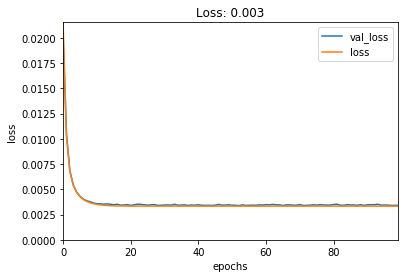

In [20]:
historydf = pd.DataFrame(history_k.history, index=history_k.epoch)
plt.figure(figsize=(8, 6))
historydf.plot(ylim=(0, historydf.values.max()))
plt.title('Loss: %.3f' % history_k.history['loss'][-1])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [15]:
# k = x_train_koopman.iloc[[10]]

# k = np.array(k)
# l = koopman.predict(k)

# m = x_train_ft_koopman.iloc[[10]]

# print(m)
# print(l)